In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

2024-03-17 20:07:36.107939: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-17 20:07:36.143255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 20:07:36.680192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [3]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
Label_name = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'];

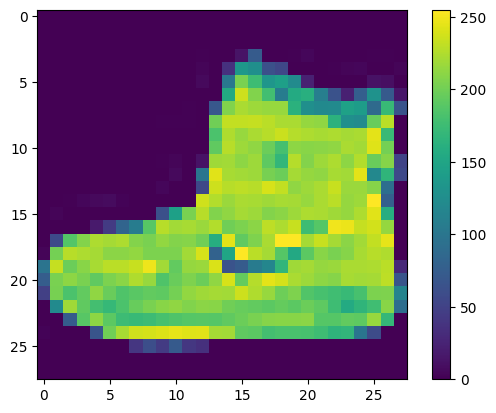

In [5]:
plt.imshow(x_train[0])
plt.colorbar()

In [6]:
y_train[0]

9

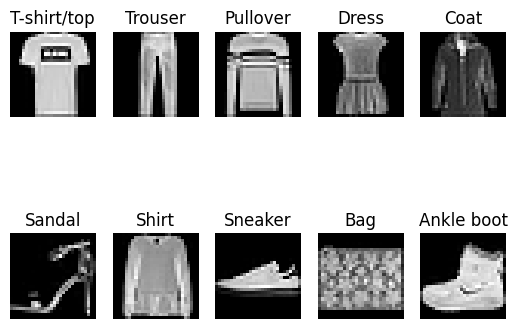

In [7]:
#find
import numpy as np

for label in range(10):
    index = np.where(y_train == label)
    index0 = index[0][0]
    # print('For label {} {}'.format(label,index0))
    image0 = x_train[index0]
    plt.subplot(2, 5, label+1)
    plt.imshow(image0, cmap='gray')   
    plt.axis('off')
    plt.title(Label_name[label])
    

In [8]:
class customLayer:
  def __init__(self, noNeurons, activatioFunction):
    self.noNeurons = noNeurons
    self.activatioFunction = activatioFunction

In [9]:
def sigmoid(input):
    return 1/(1+np.exp(-np.float128(input)))
    
def softmax(input):
    return np.exp(np.float128(input))/np.sum(np.exp(np.float128(input)))

def d_sigmoid(input):
    tmp = sigmoid(input)
    return tmp*(1 - tmp)

def d_softmax(el,y_hat):
    return -(el - y_hat)

def ReLU(input):
    tmp = input.shape[0]
    tmp2 = np.zeros(input.shape)
    for i in range(tmp)
        tmp2[i] = max(0,input[i])
    return tmp2
    
def d_ReLU(input):
    tmp = input.shape[0]
    tmp2 = np.zeros(input.shape)
    for i in range(tmp)
        if(input[i] > 0)
        tmp2[i] = 1
    return tmp2

def tanh(input):
    return np.tanh(input)

def d_tanh(input):
    return 1 - tanh(input)**2

In [10]:
class customLayerBuild:
    def __init__(self, noInput,noNeurons,activatioFunction):
        self.input = []
        self.output = []
        self.noNeurons = noNeurons
        self.noInput = noInput
        self.activatioFunction = activatioFunction
        self.W = np.random.uniform(-1,1,[noNeurons,noInput])
        self.b = np.random.uniform(-1,1,[noNeurons,1])
        self.grad_W = np.zeros(self.W.shape)
        self.grad_b = np.zeros(self.b.shape)
        # self.W = np.ones([noNeurons,noInput])
        # self.b = np.ones(noNeurons)
        self.grad_W = []
        self.grad_b = []
        self.grad_hk_1 = []
        self.grad_ak_1 = []

    def initParam(self):
        self.grad_W = np.zeros(self.W.shape)
        self.grad_b = np.zeros(self.b.shape)
        
    def feedForward(self):
        a = self.b + np.matmul(self.W,self.input)
        match self.activatioFunction:
            case "sigmoid":
                self.output = sigmoid(a)
            case "softmax":
                self.output = softmax(a)
            case _:
                self.output = a
                
        return self.output
    
    def backPropagation(self, grad_ak, param):
        self.grad_W = self.grad_W + grad_ak.reshape(-1,1)*self.input.reshape(1,-1)
        tmp = grad_ak.reshape(-1,1)
        self.grad_b = self.grad_b + tmp
        self.grad_hk_1 = np.dot(np.transpose(self.W),tmp)
        self.grad_ak_1 = self.grad_hk_1*d_sigmoid(self.input.reshape(-1,1))

        gradPolicy = param.gradPolicy
        batchReeset = param.batchReeset
        if batchReeset == 1:
            match gradPolicy:
                case "sgd":
                    eta = param.eta
                    self.W = self.W - eta*self.grad_W
                    self.b = self.b - eta*self.grad_b
                case _:
                    eta = param.eta
                    self.W = self.W - eta*self.grad_W
                    self.b = self.b - eta*self.grad_b
            self.grad_W = np.zeros(self.W.shape)
            self.grad_b = np.zeros(self.b.shape)
            

In [11]:
def NNCreate(Layers):
    noLayers = len(Layers)
    customLayerBuildArray = []
    for layerNo in range(noLayers):
        tmmp1 = []
        if layerNo == 0:
            tmp1 = customLayerBuild(Layers[layerNo].noNeurons,Layers[layerNo].noNeurons,Layers[layerNo].activatioFunction)
        else:
            tmp1 = customLayerBuild(Layers[layerNo-1].noNeurons,Layers[layerNo].noNeurons,Layers[layerNo].activatioFunction)
        tmp1.initParam()
        customLayerBuildArray.append(tmp1);

    return customLayerBuildArray

In [12]:
def NNFeedForward(x, customLayerBuildArray):
    noLayers = len(customLayerBuildArray)
    for layerNo in range(noLayers):
        if layerNo == 0:
            tmp1 = customLayerBuildArray[layerNo]
            tmp1.input = x;
            tmp1.feedForward()
        else:
            tmp = customLayerBuildArray[layerNo-1]
            tmp1 = customLayerBuildArray[layerNo]
            tmp1.input = tmp.output
            tmp1.feedForward()

In [13]:
def NNBackPropagation(a_L, customLayerBuildArray, param):
    noLayers = len(customLayerBuildArray)
    for layerNo in range(noLayers-1,-1,-1):
        # print(layerNo)
        tmp1 = customLayerBuildArray[layerNo]
        if layerNo == noLayers-1:
            tmp1.backPropagation(a_L, param)
        else:
            tmp = customLayerBuildArray[layerNo+1]
            tmp1.backPropagation(tmp.grad_ak_1, param)
        

In [14]:
def NNTraining(customLayerBuildArray, param):
    x_train = param.x_train
    y_train = param.y_train
    batchSize = param.batchSize
    noClass = param.noClass
    noEpoch = param.noEpoch
    dataLength = y_train.shape[0]
    noBatch = int(np.floor(dataLength/batchSize))
    noLayers = len(customLayerBuildArray)
    lossSave = np.zeros([noBatch,noClass])
    for batchNo in range(noEpoch):
        print(batchNo)
        for batchNo in range(noBatch):
            # print(batchNo)
            for i in range(batchSize):
                indexCal = (batchSize*batchNo) + i
                x = x_train[indexCal]
                y = y_train[indexCal]
                NNFeedForward(x, customLayerBuildArray)
                if i == batchSize-1:
                    param.batchReeset = 1
                else:
                    param.batchReeset = 0
                tmp1 = np.zeros([noClass,1])
                tmp1[int(y)] = 1
                a_L = d_softmax(tmp1,customLayerBuildArray[-1].output)
                NNBackPropagation(a_L, customLayerBuildArray, param)
    return lossSave
        

In [15]:
# Data preparation
y_train_m = np.zeros(y_train.size)
index = np.where(y_train == 0)
y_train_m[index] = 1
x_train_m = x_train.reshape(x_train.shape[0],-1,1)
print(x_train_m.shape)

(60000, 784, 1)


In [16]:
class NNTrainingParam:
    def __init__(self):
        x_train = None
        y_train = None
        batchSize = 32
        batchReeset = 0
        gradPolicy = "sgd"
        eta = 1e-3

In [17]:
inputImageSize = 784
batchSize = 32
noEpoch = 5
Layers = [
    customLayer(inputImageSize,'sigmoid'),
    customLayer(64,'sigmoid'),
    customLayer(64,'sigmoid'),
    customLayer(64,'sigmoid'),
    customLayer(64,'sigmoid'),
    customLayer(10,'softmax')
]
param = NNTrainingParam()
param.x_train = x_train.reshape(x_train.shape[0],-1,1)
param.y_train = y_train
param.batchSize = batchSize
param.batchReeset = 0
param.gradPolicy = "sgd"
param.eta = 0.001
param.noClass = 10
param.noEpoch = noEpoch

customLayerBuildArray = NNCreate(Layers)
lossSave = NNTraining(customLayerBuildArray, param)



# x_training = np.transpose(np.array([0,1,2,3]));

# customLayerBuildArray = NNCreate(Layers)
# NNFeedForward(x, customLayerBuildArray)

# el = np.array([0,1])
# y_hat = np.array([0.2,0.8])
# a_L = d_softmax(el,y_hat)
# NNBackPropagation(a_L, customLayerBuildArray)


0


/tmp/ipykernel_214752/4118515837.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.float128(input)))


1
2
3
4


In [18]:
def confusionMatrix(outputDB,dataSize):
    y_actual = outputDB[0:dataSize,0]
    y_predict = outputDB[0:dataSize,1]
    uniqueValue = np.unique(y_actual)
    noClass = uniqueValue.shape[0]
    confusionMatrixValue = np.zeros([noClass,noClass])
    confusionMatrixPercentage = np.zeros([noClass,noClass])
    classLable = uniqueValue
    for classNo1 in range(noClass):
        tmp = classLable[classNo1]
        labelLoc_tmp = np.where(y_actual == tmp)
        labelLoc_size_tmp = labelLoc_tmp[0].shape[0]
        y_predict_tmp = y_predict[labelLoc_tmp]
        for classNo2 in range(noClass):
            tmp1 = np.where(y_predict_tmp == classNo2)[0].shape[0]
            confusionMatrixValue[classNo1][classNo2] = tmp1
            confusionMatrixPercentage[classNo1][classNo2] = tmp1/labelLoc_size_tmp
    return confusionMatrixValue,confusionMatrixPercentage

In [19]:
x_train_rs = x_train.reshape(x_train.shape[0],-1,1)
x_train_rs_length = x_train_rs.shape[0]
outputDB = np.zeros([x_train_rs_length,2])
dataSize = 10000
for i in range(dataSize):
    test1 = NNFeedForward(x_train_rs[i], customLayerBuildArray)
    output = customLayerBuildArray[-1].output
    classNo = np.where(output == np.max(output))
    outputDB[i][0] = y_train[i]
    outputDB[i][1] = classNo[0]

confusionMatrixValue,confusionMatrixPercentage = confusionMatrix(outputDB,dataSize)

/tmp/ipykernel_214752/4118515837.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.float128(input)))


In [20]:
print(np.around(confusionMatrixPercentage,2))

[[0.64 0.   0.05 0.25 0.01 0.   0.   0.   0.04 0.  ]
 [0.   0.8  0.02 0.18 0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.66 0.03 0.24 0.   0.   0.   0.07 0.  ]
 [0.06 0.02 0.05 0.87 0.   0.   0.   0.   0.   0.  ]
 [0.   0.02 0.34 0.11 0.5  0.   0.   0.   0.03 0.  ]
 [0.   0.   0.   0.   0.01 0.35 0.   0.37 0.05 0.22]
 [0.18 0.   0.42 0.13 0.16 0.   0.   0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.91 0.   0.05]
 [0.02 0.   0.01 0.01 0.02 0.02 0.   0.   0.91 0.  ]
 [0.   0.   0.   0.   0.01 0.05 0.   0.12 0.01 0.81]]


In [21]:
x_test_rs = x_test.reshape(x_test.shape[0],-1,1)
x_test_rs_length = x_test_rs.shape[0]
outputDB = np.zeros([x_test_rs_length,2])
dataSize = 10000
for i in range(dataSize):
    test1 = NNFeedForward(x_test_rs[i], customLayerBuildArray)
    output = customLayerBuildArray[-1].output
    classNo = np.where(output == np.max(output))
    outputDB[i][0] = y_test[i]
    outputDB[i][1] = classNo[0]

confusionMatrixValue,confusionMatrixPercentage = confusionMatrix(outputDB,dataSize)

/tmp/ipykernel_214752/4118515837.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.float128(input)))


In [22]:
confusionMatrixValue

array([[628.,   2.,  79., 240.,   4.,   0.,   4.,   0.,  43.,   0.],
       [  3., 789.,  10., 189.,   7.,   0.,   0.,   0.,   2.,   0.],
       [ 11.,   7., 641.,  26., 240.,   0.,   1.,   0.,  74.,   0.],
       [ 68.,  19.,  61., 832.,  13.,   0.,   0.,   0.,   7.,   0.],
       [  2.,  12., 334., 105., 526.,   0.,   0.,   0.,  21.,   0.],
       [  1.,   3.,   0.,   1.,   4., 334.,   0., 361.,  55., 241.],
       [163.,   4., 413., 123., 194.,   0.,   5.,   0.,  98.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  38.,   0., 914.,   0.,  48.],
       [ 15.,   1.,   8.,   2.,  23.,  27.,   1.,   4., 917.,   2.],
       [  0.,   2.,   0.,   1.,   5.,  55.,   0., 106.,   9., 822.]])

In [23]:
print(np.around(confusionMatrixPercentage,2))

[[0.63 0.   0.08 0.24 0.   0.   0.   0.   0.04 0.  ]
 [0.   0.79 0.01 0.19 0.01 0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.64 0.03 0.24 0.   0.   0.   0.07 0.  ]
 [0.07 0.02 0.06 0.83 0.01 0.   0.   0.   0.01 0.  ]
 [0.   0.01 0.33 0.1  0.53 0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.33 0.   0.36 0.06 0.24]
 [0.16 0.   0.41 0.12 0.19 0.   0.   0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.04 0.   0.91 0.   0.05]
 [0.02 0.   0.01 0.   0.02 0.03 0.   0.   0.92 0.  ]
 [0.   0.   0.   0.   0.   0.06 0.   0.11 0.01 0.82]]
